# **Computer Vision & Internet of Things** 

The Sparks Foundation GRIP August 2021

Author: Joshua Sequeira

## **Task 2: Color Identification in Images**

Implement an image color detector which identifies all the colors in an
image or video.


We will be using OpenCV2 for image manipulation, apply KMeans to identify the major colors and then plot the information using Matplotlib.

Import Libraries


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

Uploading the Files

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving meliodasX.jpg to meliodasX.jpg


The type of this input is <class 'numpy.ndarray'>
Shape: (1200, 674, 3)


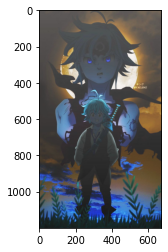

In [ ]:
imgName = 'meliodasX.jpg'
image = cv2.imread(imgName)
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

Converting the Image to RED GREEN BLUE i.e. RGB because by default OpenCV reads the images in the color order BLUE GREEN RED i.e. BGR.

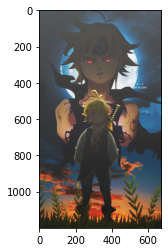

In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

Resizing the Image

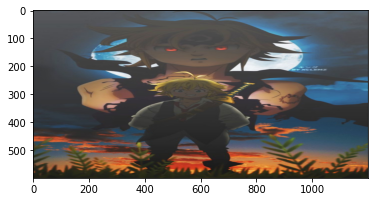

In [ ]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

**Performing Color Identification**

In [ ]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

We use KMeans as input. We reshape the image using numpy. Then Kmeans is used to fit and predict on the image to get the results.

In [ ]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [ ]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([56.7541958 , 61.65813068, 66.54614873]),
 array([197.55242844, 133.02855386,  81.8215042 ]),
 array([ 70.13296623, 122.27224877, 161.61948336]),
 array([ 79.28999407,  92.44813837, 105.21690285]),
 array([213.10001713, 223.2596335 , 228.81126905]),
 array([152.37776774,  91.5960235 ,  63.41199729]),
 array([85.72874732, 79.94599502, 75.38853151]),
 array([46.31142793, 43.6072622 , 37.78489641])]

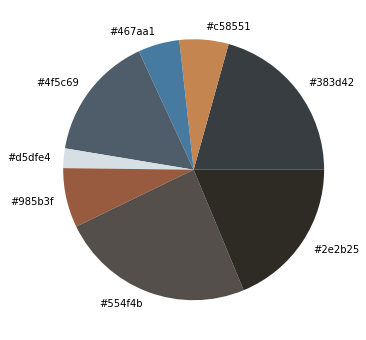

In [ ]:
get_colors(get_image(imgName), 8, True)

Thank You
